In [1]:
import math
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [2]:
# Linear functional mapping

n = 8

deno_sq = [(1 / (i+1))**2 * math.comb(n, i) for i in range(n+1)]
deno_sq[0] = 0
deno_sq = sum(deno_sq)
deno = math.sqrt(deno_sq)

p = []
for i in range(n+1):
    prob = 1 / ((i + 1) * deno)
    if i == 0:
        prob = 0
    p.append(prob)

print("Normalization factor (deno):", deno)
print("List of probabilities:", p)

s = 0
for idx, i in enumerate(p):
    s += i**2 * float(math.comb(n, idx))
print("Sum of squared probabilities:", s)

def count_ones(bit_string):
    return bit_string.count('1')

def generate_bit_strings(n):
    bit_strings = []
    for i in range(2**n):
        bit_string = bin(i)[2:].zfill(n)
        bit_strings.append(bit_string)
    return bit_strings

def map_to_ones_count(bit_strings):
    ones_count_map = {}
    for bit_string in bit_strings:
        ones_count = count_ones(bit_string)
        if bit_string not in ones_count_map:
            ones_count_map[bit_string] = ones_count
    return ones_count_map

bit_strings = generate_bit_strings(n)
print(len(bit_strings))
ones_count_map = map_to_ones_count(bit_strings)
print(len(ones_count_map))
prob_map = {"00000000": [0, 0]}
state = []
for string, count in ones_count_map.items():
        state.append(p[count])
        prob_map[string] = []
        prob_map[string].append(p[count])
        prob_map[string].append(count_ones(string))
        # print(f"{string} -> {count} -> {p[count]}")

s = 0
for i in state:
    s += i**2

print(state)

Normalization factor (deno): 3.6980320330018213
List of probabilities: [0, 0.13520704946250361, 0.0901380329750024, 0.06760352473125181, 0.054082819785001436, 0.0450690164875012, 0.038630585560715316, 0.033801762365625904, 0.030046010991667465]
Sum of squared probabilities: 1.0000000000000002
256
256
[0, 0.13520704946250361, 0.13520704946250361, 0.0901380329750024, 0.13520704946250361, 0.0901380329750024, 0.0901380329750024, 0.06760352473125181, 0.13520704946250361, 0.0901380329750024, 0.0901380329750024, 0.06760352473125181, 0.0901380329750024, 0.06760352473125181, 0.06760352473125181, 0.054082819785001436, 0.13520704946250361, 0.0901380329750024, 0.0901380329750024, 0.06760352473125181, 0.0901380329750024, 0.06760352473125181, 0.06760352473125181, 0.054082819785001436, 0.0901380329750024, 0.06760352473125181, 0.06760352473125181, 0.054082819785001436, 0.06760352473125181, 0.054082819785001436, 0.054082819785001436, 0.0450690164875012, 0.13520704946250361, 0.0901380329750024, 0.090138

In [3]:
U = np.array(state)
N = 2**8
# U[0] = 1e-6
print(U.T)
# U = U/np.linalg.norm(U)
# print(U.T)

[0.         0.13520705 0.13520705 0.09013803 0.13520705 0.09013803
 0.09013803 0.06760352 0.13520705 0.09013803 0.09013803 0.06760352
 0.09013803 0.06760352 0.06760352 0.05408282 0.13520705 0.09013803
 0.09013803 0.06760352 0.09013803 0.06760352 0.06760352 0.05408282
 0.09013803 0.06760352 0.06760352 0.05408282 0.06760352 0.05408282
 0.05408282 0.04506902 0.13520705 0.09013803 0.09013803 0.06760352
 0.09013803 0.06760352 0.06760352 0.05408282 0.09013803 0.06760352
 0.06760352 0.05408282 0.06760352 0.05408282 0.05408282 0.04506902
 0.09013803 0.06760352 0.06760352 0.05408282 0.06760352 0.05408282
 0.05408282 0.04506902 0.06760352 0.05408282 0.05408282 0.04506902
 0.05408282 0.04506902 0.04506902 0.03863059 0.13520705 0.09013803
 0.09013803 0.06760352 0.09013803 0.06760352 0.06760352 0.05408282
 0.09013803 0.06760352 0.06760352 0.05408282 0.06760352 0.05408282
 0.05408282 0.04506902 0.09013803 0.06760352 0.06760352 0.05408282
 0.06760352 0.05408282 0.05408282 0.04506902 0.06760352 0.0540

In [4]:
I = np.eye(N)

In [5]:
V = np.ones((N,1)) / math.sqrt(N) # col[1/sqrt(N); 1/sqrt(N)]row[1/N, 1/N]

In [6]:
print(V.shape)

(256, 1)


In [7]:
VV = V@V.T
print(sum(sum(VV)))

256.0


In [8]:
VAL = 2*VV-I
print(VAL*VAL.T)

[[9.84436035e-01 6.10351562e-05 6.10351562e-05 ... 6.10351562e-05
  6.10351562e-05 6.10351562e-05]
 [6.10351562e-05 9.84436035e-01 6.10351562e-05 ... 6.10351562e-05
  6.10351562e-05 6.10351562e-05]
 [6.10351562e-05 6.10351562e-05 9.84436035e-01 ... 6.10351562e-05
  6.10351562e-05 6.10351562e-05]
 ...
 [6.10351562e-05 6.10351562e-05 6.10351562e-05 ... 9.84436035e-01
  6.10351562e-05 6.10351562e-05]
 [6.10351562e-05 6.10351562e-05 6.10351562e-05 ... 6.10351562e-05
  9.84436035e-01 6.10351562e-05]
 [6.10351562e-05 6.10351562e-05 6.10351562e-05 ... 6.10351562e-05
  6.10351562e-05 9.84436035e-01]]


In [9]:
Zf = np.eye(N)
# 198 | 6 , 66 , 130

Zf[198, 198] = -1
Zf[6, 6] = -1
Zf[66, 66] = -1
Zf[130, 130] = -1
# print(Zf)

In [10]:
# Be careful with matrix multiplication
# Multiply using @ operator
# For power of a matrix use np.linalg.matrix_power
sol = np.linalg.matrix_power((2*VV - I) @ Zf, 6) @ U

In [11]:
print(sol)

[-0.06485079  0.07035625  0.07035625  0.02528724  0.07035625  0.02528724
  0.47824745  0.00275273  0.07035625  0.02528724  0.02528724  0.00275273
  0.02528724  0.00275273  0.00275273 -0.01076797  0.07035625  0.02528724
  0.02528724  0.00275273  0.02528724  0.00275273  0.00275273 -0.01076797
  0.02528724  0.00275273  0.00275273 -0.01076797  0.00275273 -0.01076797
 -0.01076797 -0.01978178  0.07035625  0.02528724  0.02528724  0.00275273
  0.02528724  0.00275273  0.00275273 -0.01076797  0.02528724  0.00275273
  0.00275273 -0.01076797  0.00275273 -0.01076797 -0.01076797 -0.01978178
  0.02528724  0.00275273  0.00275273 -0.01076797  0.00275273 -0.01076797
 -0.01076797 -0.01978178  0.00275273 -0.01076797 -0.01076797 -0.01978178
 -0.01076797 -0.01978178 -0.01978178 -0.02622021  0.07035625  0.02528724
  0.47824745  0.00275273  0.02528724  0.00275273  0.00275273 -0.01076797
  0.02528724  0.00275273  0.00275273 -0.01076797  0.00275273 -0.01076797
 -0.01076797 -0.01978178  0.02528724  0.00275273  0

In [12]:
print(sol[6], sol[66], sol[130], sol[198])

0.4782474532273442 0.47824745322734424 0.47824745322734424 0.44219224003734325


In [13]:
sum([sol[6]**2, sol[66]**2, sol[130]**2, sol[198]**2])

0.8816958567045657

In [14]:
sum(sol*sol)

0.9999999999999972

In [15]:
G = (2*VV - I) @ Zf
print(G)
U0 = (np.array(state) + Zf@(np.array(state)))/2
print(U0)

[[-0.9921875  0.0078125  0.0078125 ...  0.0078125  0.0078125  0.0078125]
 [ 0.0078125 -0.9921875  0.0078125 ...  0.0078125  0.0078125  0.0078125]
 [ 0.0078125  0.0078125 -0.9921875 ...  0.0078125  0.0078125  0.0078125]
 ...
 [ 0.0078125  0.0078125  0.0078125 ... -0.9921875  0.0078125  0.0078125]
 [ 0.0078125  0.0078125  0.0078125 ...  0.0078125 -0.9921875  0.0078125]
 [ 0.0078125  0.0078125  0.0078125 ...  0.0078125  0.0078125 -0.9921875]]
[0.         0.13520705 0.13520705 0.09013803 0.13520705 0.09013803
 0.         0.06760352 0.13520705 0.09013803 0.09013803 0.06760352
 0.09013803 0.06760352 0.06760352 0.05408282 0.13520705 0.09013803
 0.09013803 0.06760352 0.09013803 0.06760352 0.06760352 0.05408282
 0.09013803 0.06760352 0.06760352 0.05408282 0.06760352 0.05408282
 0.05408282 0.04506902 0.13520705 0.09013803 0.09013803 0.06760352
 0.09013803 0.06760352 0.06760352 0.05408282 0.09013803 0.06760352
 0.06760352 0.05408282 0.06760352 0.05408282 0.05408282 0.04506902
 0.09013803 0.067603

In [16]:
prob_non_solution = []
for t in range(100):
    sol = np.linalg.matrix_power(G, t) @ U
    sol[6] = sol[66]=sol[130]=sol[198] = 0
    # print(np.linalg.norm(sol))
    prob_non_solution.append(np.linalg.norm(sol)**2)

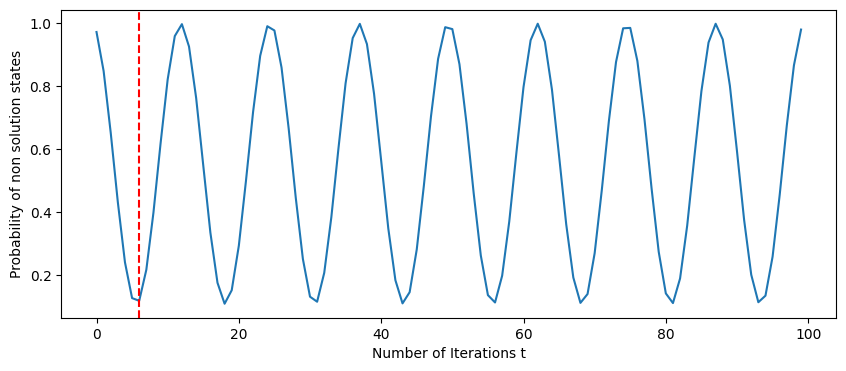

In [17]:
plt.figure(figsize=(10,4))
plt.plot(prob_non_solution)
plt.axvline(x=6, color='r', linestyle='--', label="x = 6")
plt.xlabel("Number of Iterations t")
plt.ylabel("Probability of non solution states")
plt.show()

In [18]:
# argmin t ((I + Zf) @ G^t @ U) / 2 

In [22]:
probabilities = []
for t in range(100):
    sol = (np.linalg.matrix_power(G, t) @ U + Zf @ np.linalg.matrix_power(G, t) @ U) / 2
    # sol[6] = sol[66]=sol[130]=sol[198] = 0
    print(t, np.linalg.norm(sol)**2)
    probabilities.append(np.linalg.norm(sol)**2)

0 0.972700453638295
1 0.8486506568002218
2 0.6520122836576172
3 0.4311768088510444
4 0.24049046250868283
5 0.1268799626757236
6 0.11830414329543393
7 0.21687345991843193
8 0.3983306197820269
9 0.6180201499510362
10 0.8218778301104323
11 0.9597355592834862
12 0.997667411931529
13 0.9263385961919275
14 0.7633026878131466
15 0.5486818048727256
16 0.33529280528180067
17 0.17564938815846595
18 0.10903880068541497
19 0.15185349212357907
20 0.2935570345018496
21 0.4992770716880924
22 0.7183871882809812
23 0.8969657540252153
24 0.9910657000072385
25 0.9775296176454848
26 0.8596886522086861
27 0.6665427287848252
28 0.44562385196644244
29 0.2512987765955912
30 0.1313896891893193
31 0.11540546672651336
32 0.20727972645387496
33 0.38440278726662785
34 0.6031857709178658
35 0.8097875525247249
36 0.9533647248948062
37 0.9985838432652133
38 0.9343167652244593
39 0.7763792170091813
40 0.5636386421254028
41 0.3484491664234911
42 0.18376757493945045
43 0.11012097807754335
44 0.1456333430342621
45 0.2815